In [28]:
import numpy as np 
import pandas as pd

In [29]:
df = pd.read_csv('https://raw.githubusercontent.com/benvictoria21/pandas/master/dataset/All%20India%20Mobile%20Data%20Speed%20Measurement%20for%20July%202020(TRAI).csv')
df.head()

,Service_provider,Technology,Download_Upload,Data_Speed(Kbps),Signal_strength,Service_Area
0,JIO,4G,download,8158,-102.0,Maharashtra
1,JIO,4G,upload,1970,-102.0,Maharashtra
2,JIO,4G,download,50042,-73.0,Maharashtra
3,JIO,4G,download,62277,-71.0,Maharashtra
4,JIO,4G,download,63100,-71.0,Maharashtra


In [30]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 

In [31]:
df.isnull().sum()

Service_provider        0
Technology              0
Download_Upload         0
Data_Speed(Kbps)        0
Signal_strength     91959
Service_Area         5753
dtype: int64

In [32]:
df = df.dropna()

In [33]:
a = df.groupby(['Service_provider']).mean()
a

,Data_Speed(Kbps),Signal_strength
Service_provider,,
AIRTEL,5615.145071,-91.302208
CELLONE,2087.808414,-88.564979
DOLPHIN,1406.333333,-97.666667
IDEA,6757.734493,-92.504456
JIO,11205.115785,-85.374524
VODAFONE,7235.153379,-92.154695


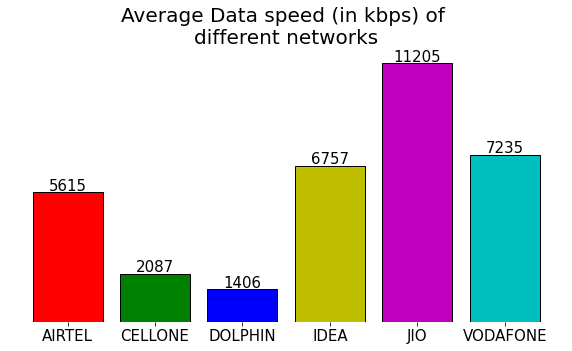

In [34]:
plt.figure(figsize = (10,5))
plt.bar(a['Data_Speed(Kbps)'].index,a['Data_Speed(Kbps)'].values,color = list('rgbymc'), edgecolor = 'black');
plt.title('Average Data speed (in kbps) of \ndifferent networks', fontsize = 20)
#plt.xlabel('networks', fontsize = 15)
plt.ylabel('Data speed',fontsize = 15)
plt.xticks(fontsize = 15)
for i,j in zip(a['Data_Speed(Kbps)'].index,a['Data_Speed(Kbps)'].values):
    plt.text(i,j+70,int(j),fontsize = 15,horizontalalignment='center')
plt.box()
plt.gca().axes.get_yaxis().set_visible(False)

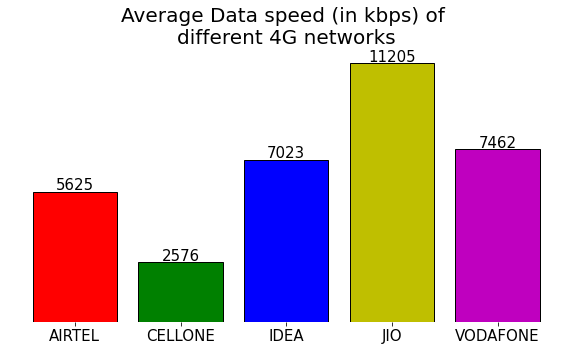

In [35]:
b = df.copy()
b = b.groupby(['Service_provider','Technology']).mean()
b = b.drop(index = '3G', level = 1)
b.index.droplevel(1)
plt.figure(figsize = (10,5))
plt.bar(b.index.droplevel(1),b['Data_Speed(Kbps)'].values,color = list('rgbymc'), edgecolor = 'black');
plt.title('Average Data speed (in kbps) of \ndifferent 4G networks', fontsize = 20)
#plt.xlabel('networks', fontsize = 15)
plt.ylabel('Data speed',fontsize = 15)
plt.xticks(fontsize = 15)
for i,j in zip(b.index.droplevel(1),b['Data_Speed(Kbps)'].values):
    plt.text(i,j+70,int(j),fontsize = 15,horizontalalignment='center')
plt.box()
plt.gca().axes.get_yaxis().set_visible(False)
#plt.gca().axes.get_xaxis().set_visible(False)

In [36]:
c = df.copy()
c = c.groupby(['Download_Upload','Technology','Service_provider']).mean()
c = c.drop(index = '3G',level = 1)
c

Data_Speed(Kbps)  Signal_strength
Download_Upload Technology Service_provider                                   
download        4G         AIRTEL                 7654.282337       -91.225141
                           CELLONE                2573.195652       -92.740847
                           IDEA                   8143.201833       -92.801095
                           JIO                   18754.938899       -85.336086
                           VODAFONE               8533.023498       -92.217158
upload          4G         AIRTEL                 3594.909343       -91.387219
                           CELLONE                2579.016027       -92.562679
                           IDEA                   5898.207395       -92.867195
                           JIO                    3652.657823       -85.412974
                           VODAFONE               6387.194820       -92.347489

Text(0.5, 1.0, &#39;Downloading speed v/s Uploadidng speed\nof different 4G network&#39;)

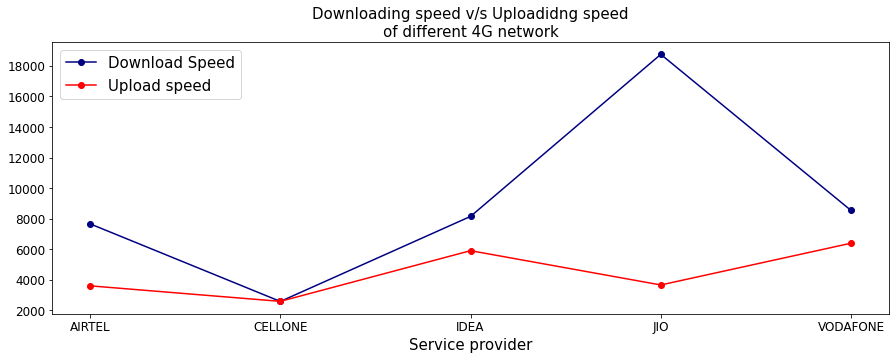

In [37]:
plt.figure(figsize = (15,5))
plt.plot(['AIRTEL','CELLONE','IDEA','JIO','VODAFONE'], c['Data_Speed(Kbps)'][:5].values, color = 'navy', marker = 'o', label = 'Download Speed');
plt.plot(['AIRTEL','CELLONE','IDEA','JIO','VODAFONE'], c['Data_Speed(Kbps)'][5:10].values, color = 'red', marker = 'o', label = 'Upload speed');
plt.legend(loc = 0,fontsize = 15);
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel('Service provider',fontsize = 15)
plt.title('Downloading speed v/s Uploadidng speed\nof different 4G network',fontsize = 15)

In [38]:
d = df.groupby(['Service_Area','Technology']).mean()
d = d.drop(index = '3G',level = 1)
d = d.reset_index()
d = d.drop(['Technology','Signal_strength'],axis = 1)
d = d.sort_values('Data_Speed(Kbps)',ascending = False)
d = d.drop(14)
d

,Service_Area,Data_Speed(Kbps)
12,Madhya Pradesh,18564.175760
11,Kolkata,16198.575858
4,Delhi,12625.648256
22,West Bengal,12109.973154
18,Rajasthan,11764.623330
13,Maharashtra,9830.982492
5,Gujarat,9725.781046
3,Chennai,7224.816963
6,Haryana,7130.998134
0,Andhra Pradesh,6793.579983


Text(0.5, 1.0, &#39;Best to worst performing states\nin terms of avg. network speed&#39;)

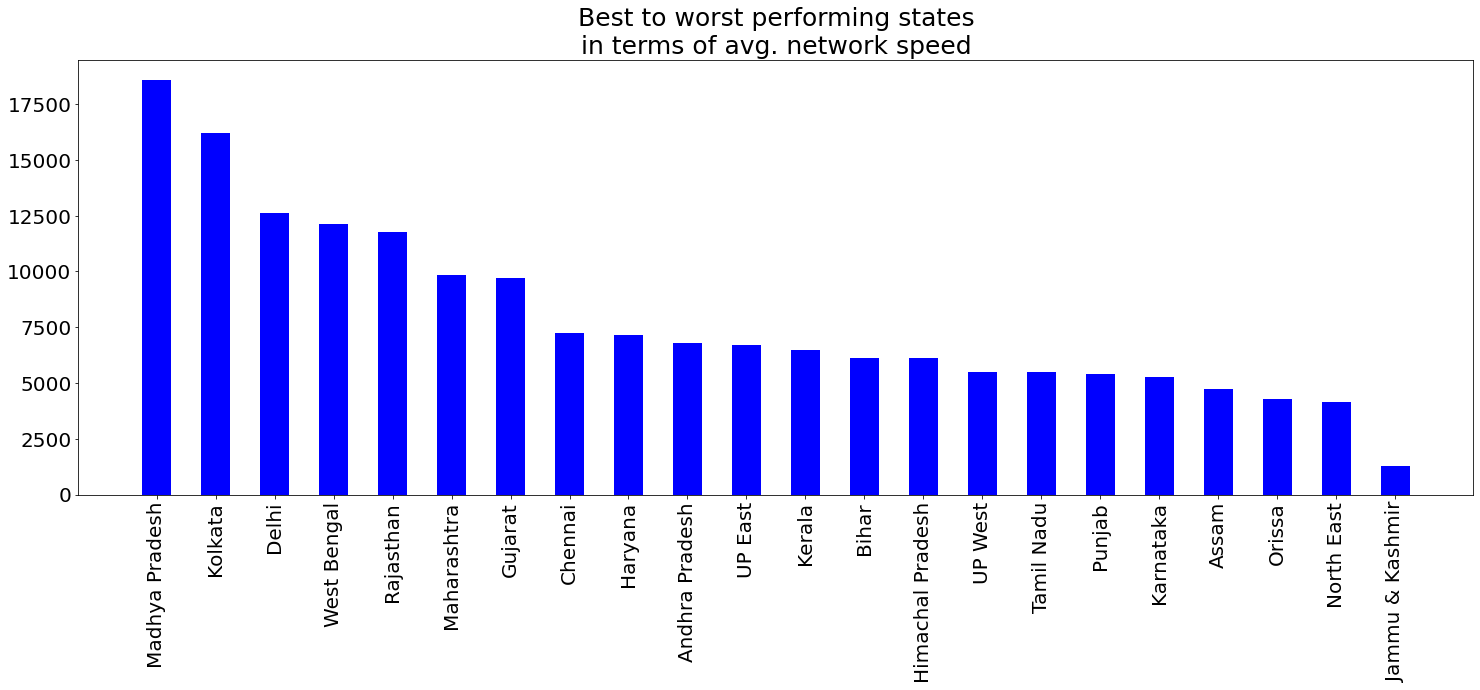

In [39]:
plt.figure(figsize = (25,8))
plt.bar(d['Service_Area'],d['Data_Speed(Kbps)'],width = 0.5,color = 'blue');
plt.xticks(rotation = 90, fontsize = 20)
plt.yticks(fontsize = 20)
plt.title('Best to worst performing states\nin terms of avg. network speed',fontsize = 25)

In [40]:
e = df.where(df['Service_Area']=='Rajasthan')
e = e.where(e['Technology']=='4G')
e = e.dropna()
e

,Service_provider,Technology,Download_Upload,Data_Speed(Kbps),Signal_strength,Service_Area
286,JIO,4G,download,2069.0,-104.0,Rajasthan
287,JIO,4G,download,506.0,-111.0,Rajasthan
288,JIO,4G,download,25341.0,-96.0,Rajasthan
289,JIO,4G,upload,1590.0,-109.0,Rajasthan
290,JIO,4G,upload,1281.0,-108.0,Rajasthan
...,...,...,...,...,...,...
565858,JIO,4G,download,5129.0,-69.0,Rajasthan
565860,JIO,4G,upload,1436.0,-71.0,Rajasthan
565861,JIO,4G,upload,3133.0,-67.0,Rajasthan
565939,VODAFONE,4G,download,4517.0,-94.0,Rajasthan


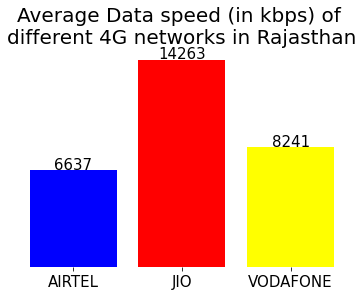

In [41]:
f = e.groupby(['Service_provider','Technology']).mean()
f
plt.figure(figsize = (6,4))
plt.bar(f.index.droplevel(1),f['Data_Speed(Kbps)'].values,color = ['blue','red','yellow']);
plt.title('Average Data speed (in kbps) of \ndifferent 4G networks in Rajasthan', fontsize = 20)
#plt.xlabel('networks', fontsize = 15)
plt.ylabel('Data speed',fontsize = 15)
plt.xticks(fontsize = 15)
for i,j in zip(f.index.droplevel(1),f['Data_Speed(Kbps)'].values):
    plt.text(i,j+100,int(j),fontsize = 15,horizontalalignment='center')
plt.box()
plt.gca().axes.get_yaxis().set_visible(False)

In [42]:
g = e.groupby(['Download_Upload','Technology','Service_provider']).mean()
g

Data_Speed(Kbps)  Signal_strength
Download_Upload Technology Service_provider                                   
download        4G         AIRTEL                 8933.219564       -90.214923
                           JIO                   23225.516607       -83.611210
                           VODAFONE              10536.387671       -91.538356
upload          4G         AIRTEL                 4316.087333       -90.211115
                           JIO                    5298.436730       -83.685358
                           VODAFONE               5937.342503       -91.650619

Text(0.5, 1.0, &#39;Downloading speed v/s Uploading speed\nof different 4G network&#39;)

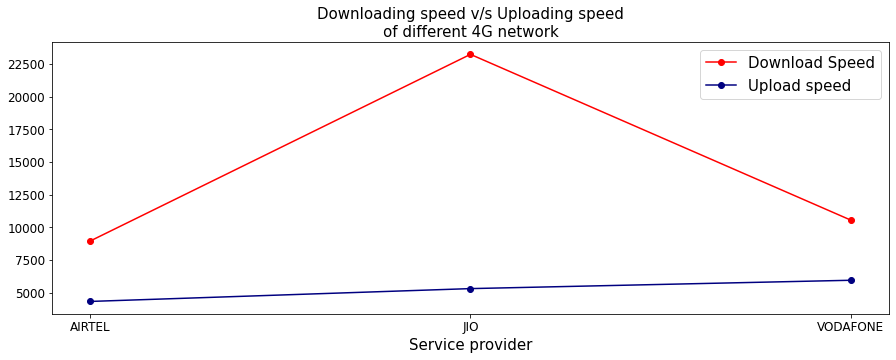

In [43]:
plt.figure(figsize = (15,5))
plt.plot(['AIRTEL','JIO','VODAFONE'], g['Data_Speed(Kbps)'][:3].values, color = 'red', marker = 'o', label = 'Download Speed');
plt.plot(['AIRTEL','JIO','VODAFONE'], g['Data_Speed(Kbps)'][3:6].values, color = 'navy', marker = 'o', label = 'Upload speed');
plt.legend(loc = 0,fontsize = 15);
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel('Service provider',fontsize = 15)
plt.title('Downloading speed v/s Uploading speed\nof different 4G network',fontsize = 15)